In [ ]:
#upload csv data and find accuracy
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
file_path = '/content/drive/My Drive/cancer.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
df

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
df.head(10)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
5,49,White,Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,32,Positive,Positive,20,11,3,Alive
6,64,White,Single (never married),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,22,Positive,Positive,1,1,3,Dead
7,55,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,15,Positive,Positive,9,1,3,Alive
8,59,White,Single (never married),NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,70,Positive,Positive,9,1,4,Dead
9,67,White,Married (including common law),NaN,T3,N2,IIIA,Poorly differentiated; Grade III,Regional,55,Positive,Positive,9,9,4,Dead


In [ ]:
df.tail()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


In [ ]:
df.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [ ]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
Unnamed: 3,4024
T Stage,0
N Stage,0
6th Stage,0
Grade,0
A Stage,0
Tumor Size,0


In [ ]:
#removing the unwanted table "Unnamed"
df.drop(columns=['Unnamed: 3'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [ ]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

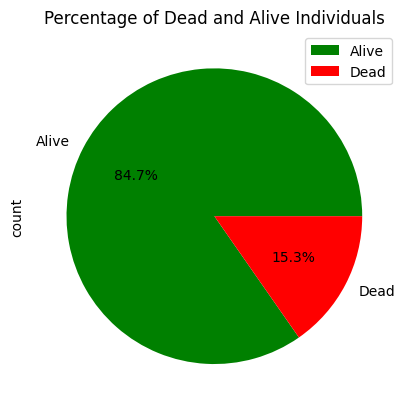

In [ ]:
#finding how many dead and how many alive and visulizing using piechart
import matplotlib.pyplot as plt

df['Status'].value_counts().plot(kind='pie',colors=['green','red'],autopct='%1.1f%%')
plt.title('Percentage of Dead and Alive Individuals')
plt.legend(['Alive', 'Dead'])
plt.show()

<ipython-input-48-df294f772c35>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values, palette='viridis')


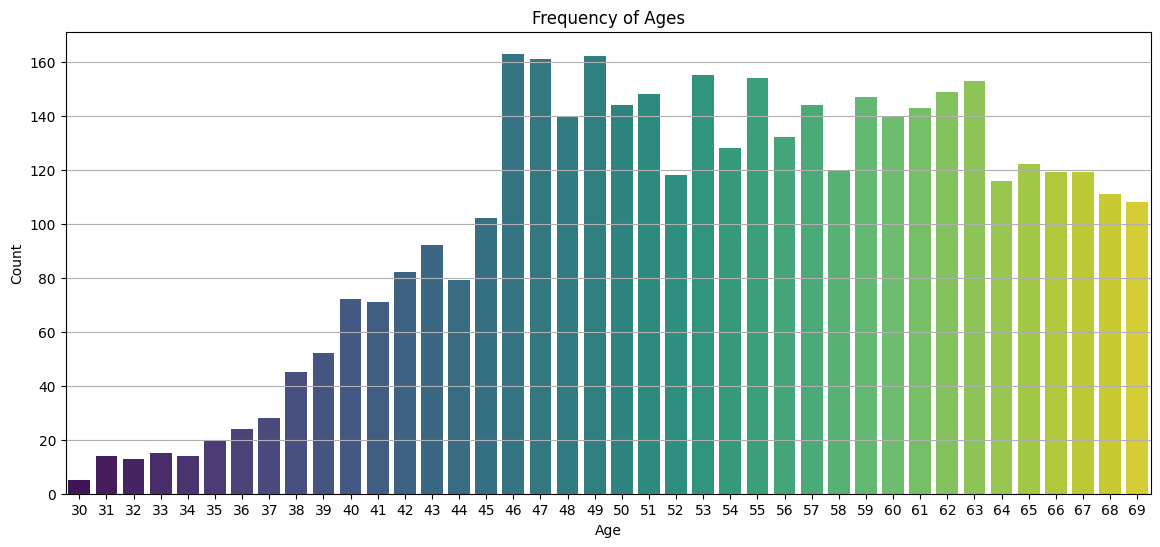

In [ ]:
#graph for Age and find Out who is most oldest
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
y = df['Age'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

# Bar plot of age frequencies
sns.barplot(x=y.index, y=y.values, palette='viridis')

plt.title('Frequency of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

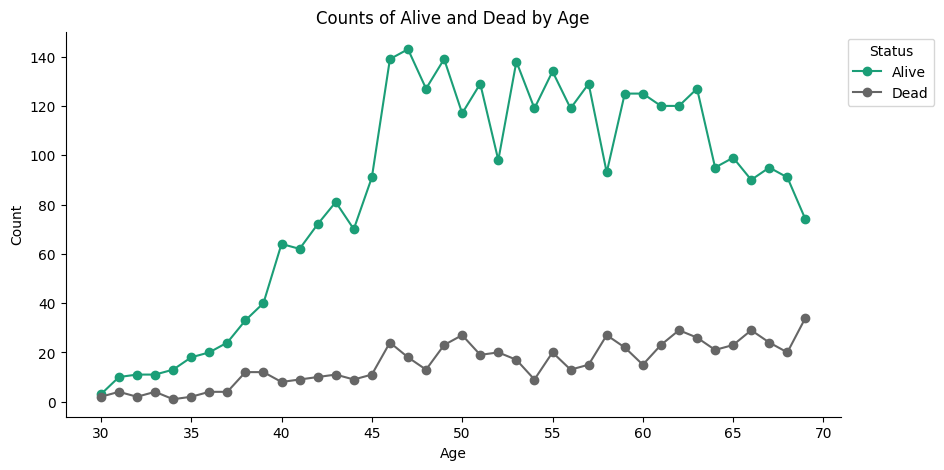

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Age and Status to get the counts
age_status_counts = df.groupby(['Age', 'Status']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 5))
age_status_counts.plot(ax=plt.gca(), marker='o', cmap='Dark2')

# Customize the plot
plt.title('Counts of Alive and Dead by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine()

plt.show()

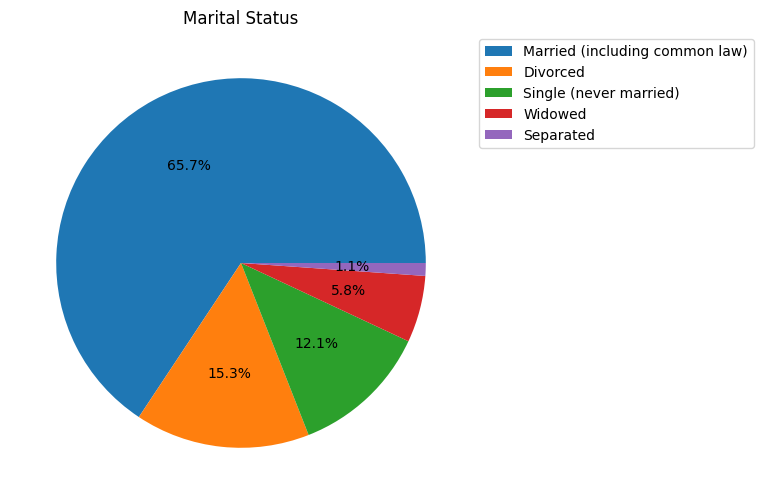

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for Marital Status
df['Marital Status'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, figsize=(6, 6))
plt.title('Marital Status')
plt.ylabel('')  # Remove y-label
plt.legend(labels=df['Marital Status'].unique(), bbox_to_anchor=(1, 1))
plt.show()



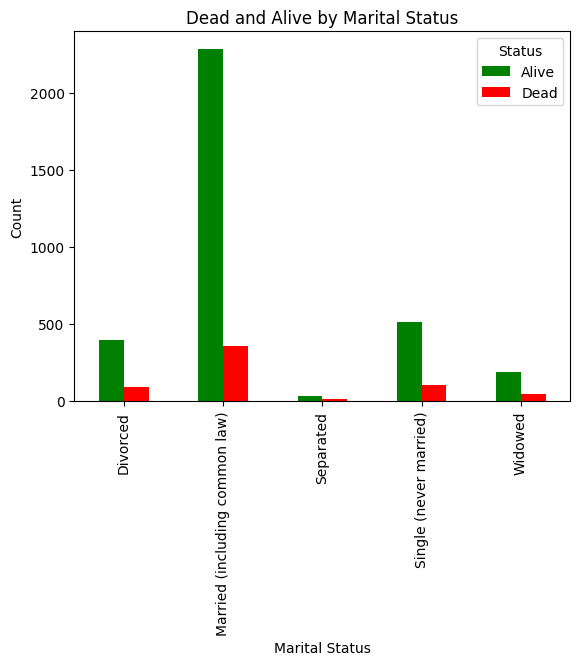

In [ ]:
# Stacked bar plot for Marital Status and Status (Dead or Alive)
df.groupby(['Marital Status', 'Status']).size().unstack(fill_value=0).plot(kind='bar', color=['green', 'red'])
plt.title('Dead and Alive by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Status', bbox_to_anchor=(1, 1))
plt.show()


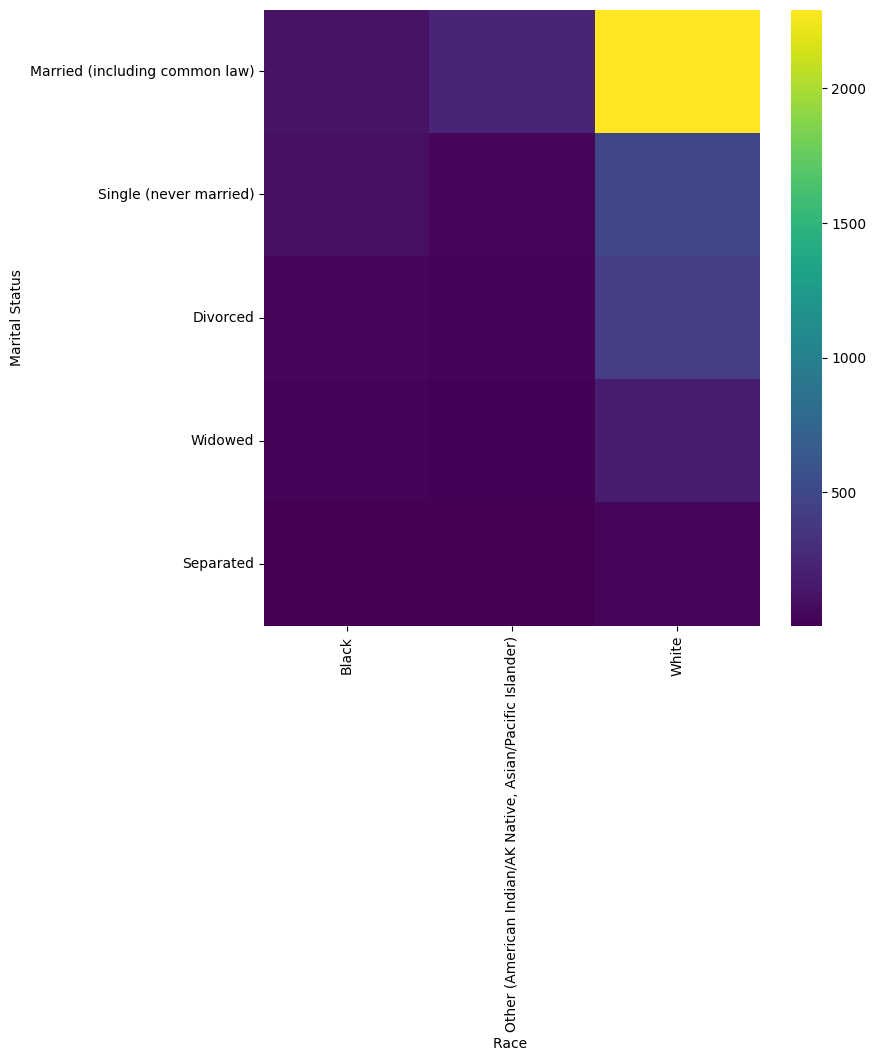

In [ ]:
#heatmap to compare marital Status with race
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Marital Status'].value_counts()
    for x_label, grp in df.groupby('Race ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Race ')
_ = plt.ylabel('Marital Status')

In [ ]:
#change value of Race column of Other with Others
df['Race '] = df['Race '].replace({
    'Other (American Indian/AK Native, Asian/Pacific Islander)': 'Others'
})

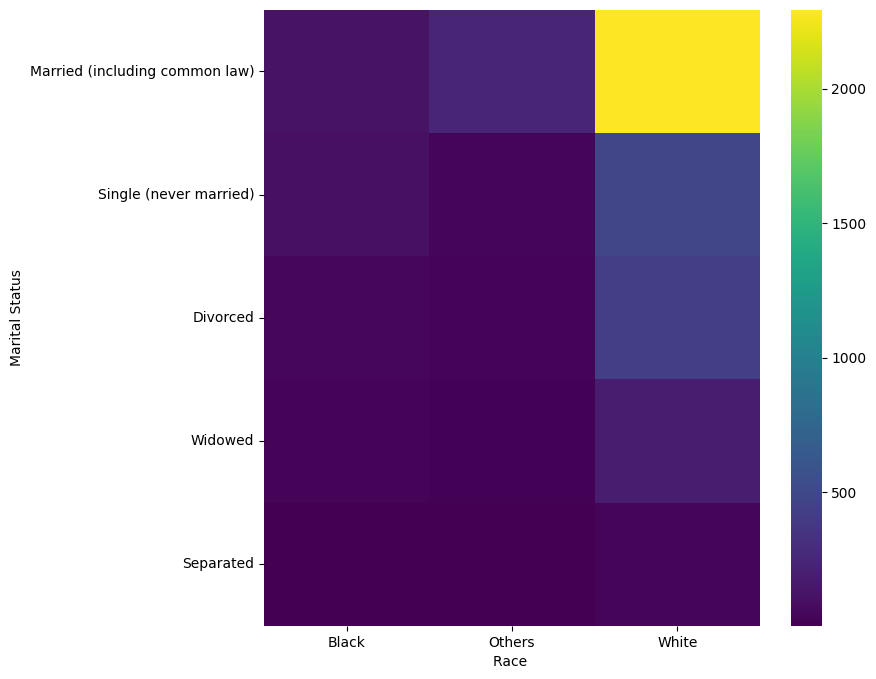

In [ ]:
#heatmap to compare marital Status with race
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Marital Status'].value_counts()
    for x_label, grp in df.groupby('Race ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Race ')
_ = plt.ylabel('Marital Status')

In [ ]:
#checking the count of all object datatype column and its value
for i in df:
  if df[i].dtype=='object':
    print(i + " value count\n")
    print(df[i].value_counts())
    print("\n---------------------\n")


Race  value count

Race 
White     3413
Others     320
Black      291
Name: count, dtype: int64

---------------------

Marital Status value count

Marital Status
Married (including common law)    2643
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: count, dtype: int64

---------------------

T Stage  value count

T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

---------------------

N Stage value count

N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

---------------------

6th Stage value count

6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

---------------------

Grade value count

Grade
Moderately differentiated; Grade II       2351
Poorly differentiated; Grade III          1111
Well differentiated; Grade I               543
Undifferentiated; anaplastic; Grade IV   

In [ ]:
#check if there is any space in column names
print(df.columns)

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


Convert all columns with object data types to integers to make it easier to perform logistic regression.

In [ ]:
df['Race '] = df['Race '].replace({'White': 0, 'Others': 1, 'Black': 2})

In [ ]:
df['Marital Status']=df['Marital Status'].replace({'Married (including common law)':0,
                                                   'Single (never married)':1,'Divorced':2,
                                                   'Widowed':3,'Separated':4})

In [ ]:
df['T Stage ']=df['T Stage '].replace({'T1': 0,'T2': 1,'T3': 2,'T4': 3})

In [ ]:
df['N Stage']=df['N Stage'].replace({'N1': 0,'N2': 1,'N3': 3})

In [ ]:
df['6th Stage']=df['6th Stage'].replace({'IIA': 0,'IIB': 1,'IIIA': 2,'IIIB': 3,'IIIC':4})

In [ ]:
df['Grade']=df['Grade'].replace({'Well differentiated; Grade I': 0,
                                 'Moderately differentiated; Grade II': 1,
                                 'Poorly differentiated; Grade III': 2,
                                 'Undifferentiated; anaplastic; Grade IV':3})

In [ ]:
df['A Stage']=df['A Stage'].replace({ "Regional": 1, "Distant": 0})

In [ ]:
df['Estrogen Status']=df['Estrogen Status'].replace({'Positive': 1, 'Negative': 0})

In [ ]:
df['Progesterone Status']=df['Progesterone Status'].replace({'Positive': 1, 'Negative': 0})

In [ ]:
df['Status']=df['Status'].replace({'Alive': 0, 'Dead': 1})

In [ ]:
#Cross checking if we had missed any column
flag=0
for i in df:
  if df[i].dtype=='object':
    print(i + " value count\n")
    print(df[i].value_counts())
    print("\n---------------------\n")
    flag=1
if flag==0:
  print("no categorical data")

no categorical data


In [ ]:
#Test and Train Data
from sklearn.model_selection import train_test_split
X = df.drop(columns='Status')
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)


In [ ]:
#using logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:


#Predicting the test set result
y_pred=model.predict(X_test)
print(y_pred)


[0 0 0 ... 0 0 0]


In [ ]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[952  28]
 [101  86]]


In [ ]:
#finding Accuracy from train and test data
accuracy=accuracy_score(y_test,y_pred)
print(accuracy.round(2)*100)

89.0


In [ ]:
#Comparing the predict value and test value one table
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
1718,0,0
1204,0,0
2722,0,0
1937,0,0
1226,0,0
...,...,...
1164,0,0
3107,0,0
2751,0,0
3602,1,0


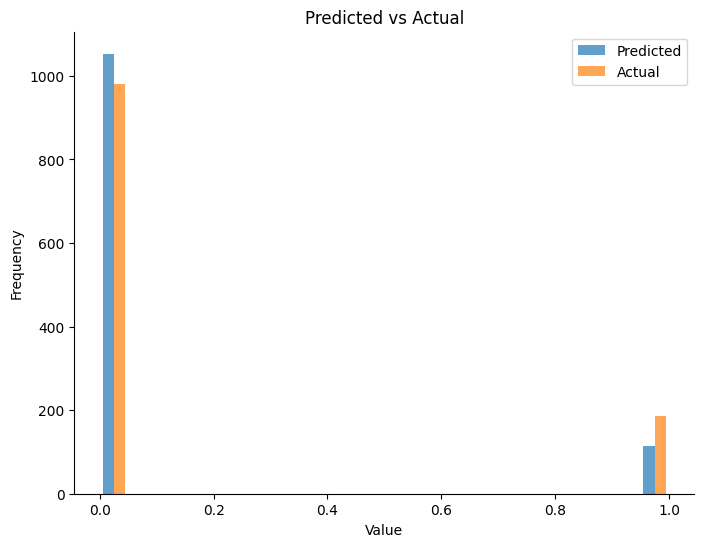

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size

# Plot 'Predicted' and 'Actual' histograms side-by-side
plt.hist([df1['Predicted'], df1['Actual']], bins=20, label=['Predicted', 'Actual'], alpha=0.7)

# Customize the plot
plt.title('Predicted vs Actual')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.legend()  # Add a legend

plt.show()


In [ ]:
# Prepare new data with all required columns
new_data = pd.DataFrame({
    'Age': [50],  # Adjust to match the column names used during training
    'Race ': [0],
    'Marital Status': [1],
    'T Stage ': [0],
    'N Stage': [1],
    '6th Stage': [2],
    'Grade': [1],
    'A Stage': [1],
    'Tumor Size': [5.5],  # Use a default value or the actual value if known
    'Estrogen Status': [1],
    'Progesterone Status': [0],
    'Regional Node Examined': [10],  # Use a default value or the actual value if known
    'Reginol Node Positive': [5],  # Use a default value or the actual value if known
    'Survival Months': [12]  # Use a default value or the actual value if known
})

# Ensure columns match the training data
new_data = new_data[X_train.columns]  # Align with the training data columns

# Make predictions
predictions = model.predict(new_data)
print('Predicted Status:', 'Alive' if predictions[0] == 1 else 'Dead')

Predicted Status: Alive
